In [1]:
# import numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import os to read system directory
import os

# import train_test_split to split the data into training set and testing set, 
# RandomizedSearchCV for cross validation and GridSearchCV for hyperparameters tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# import MinMaxScaler to normalize the data and OneHotEncoder to encode the categorical features as one-hot numeric arrays
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# import different classification methods of machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# import accuracy_score to measure the performance of a specific method
from sklearn.metrics import make_scorer, accuracy_score

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

# set the size of figure
plt.rcParams['figure.figsize'] = (8,6)

In [3]:
# get the current working directory
path=os.getcwd()

# read the training data
train_data_full = pd.read_csv(path+'/train.csv')

# display the first 10 rows of the training data
train_data_full.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [4]:
# get an overview of the training data
train_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# There are no missing values. Great!

In [5]:
# compute pairwise correlation and select those features whose correlation is larger than 0.5
corr = train_data_full.corr()
corr_large = corr[corr>0.5]

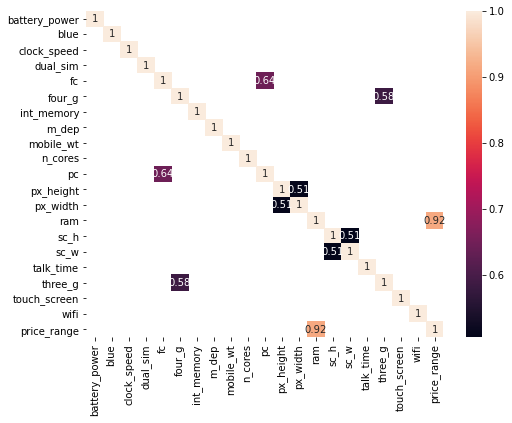

In [6]:
# visualize the correlation
sns.heatmap(corr_large, annot=True)

In [ ]:
# Notice there are four pair correlations for the features, which are larger than 0.5. To reduce the collinearity, in the following we will group these collinear features together.

In [7]:
# check the relation between the features 'four_g' and 'three_g'
train_data_full.groupby('four_g')['three_g'].value_counts()

four_g  three_g
0       1           480
        0           477
1       1          1043
Name: three_g, dtype: int64

In [8]:
# Notice there are only three combinations for these two features. Thus we will group them together and assign them to the new feature '3&4_g'.
train_data_full['3&4_g'] = train_data_full['three_g'] + train_data_full['four_g']

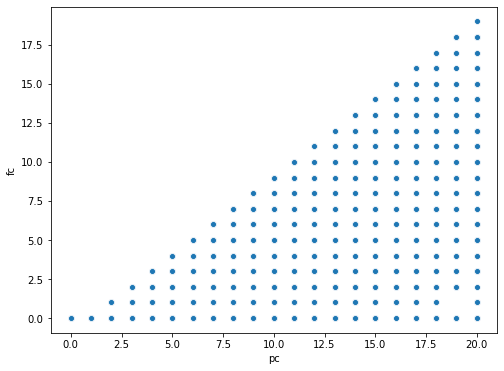

In [9]:
# visualize the relation between the features 'pc' and 'fc'
sns.scatterplot(x=train_data_full.pc, y=train_data_full.fc)

In [10]:
# group the features 'fc' and 'pc' together and assign them to the new feature 'camera'
train_data_full['camera'] = train_data_full['fc'] + train_data_full['pc']

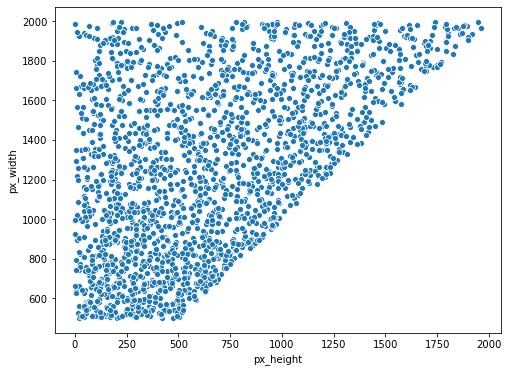

In [11]:
# visualize the relation between the features 'px_height' and 'px_width'
sns.scatterplot(x=train_data_full.px_height, y=train_data_full.px_width)

In [12]:
# group the features 'px_height' and 'px_width' together and assign them to the new feature 'px_size'
train_data_full['px_size'] = train_data_full['px_height'] + train_data_full['px_width']

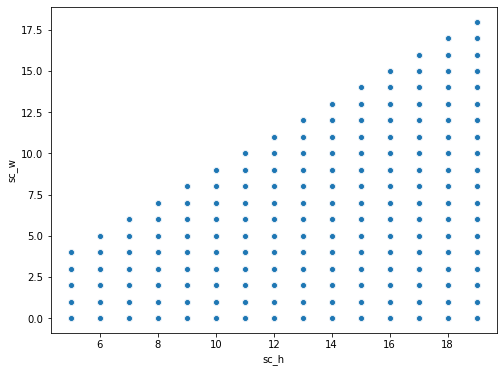

In [13]:
# visualize the relation between the features 'sc_h' and 'sc_w'
sns.scatterplot(x=train_data_full.sc_h, y=train_data_full.sc_w)

In [14]:
# group the features 'sc_h' and 'sc_w' together and assign them to the new feature 'sc_size'
train_data_full['sc_size'] = train_data_full['sc_h'] + train_data_full['sc_w']

In [15]:
# select the collinear features which will be dropped
drop_cols = ['three_g', 'four_g', 'fc', 'pc', 'px_height', 'px_width', 'sc_h', 'sc_w']

In [16]:
# split the features and target from the training data and drop the collinear features
X_full = train_data_full.drop(['price_range']+drop_cols, axis=1)
y_full = train_data_full.price_range

In [17]:
# split the training data into training set and testing set
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y_full, train_size=0.7, random_state=42)

In [18]:
# find the numerical columns whose number of unique values is larger than three
numerical_columns = [col for col in X_train_full.columns if pd.Series(X_train_full[col].unique()).value_counts().sum()>3]
print(numerical_columns)

['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time', 'camera', 'px_size', 'sc_size']


In [19]:
# find the categorical columns whose number of unique values is less or equal to three
categorical_columns = [col for col in X_train_full.columns if pd.Series(X_train_full[col].unique()).value_counts().sum()<=3]
print(categorical_columns)

['blue', 'dual_sim', 'touch_screen', 'wifi', '3&4_g']


In [20]:
# split the training and testing sets as categorical and numerical parts
X_train_cat = X_train_full[categorical_columns]
X_train_num = X_train_full[numerical_columns]
X_test_cat = X_test_full[categorical_columns]
X_test_num = X_test_full[numerical_columns]

In [21]:
# create a one-hot encoder
OH_encoder = OneHotEncoder(drop='first', sparse=False)

In [22]:
# encode the categorical features as one-hot arrays
X_train_cat_oh = OH_encoder.fit_transform(X_train_cat)
X_test_cat_oh = OH_encoder.transform(X_test_cat)
OH_column_names = OH_encoder.get_feature_names(categorical_columns)

In [23]:
# transform them into DataFrame
X_train_cat_OH = pd.DataFrame(X_train_cat_oh, columns=OH_column_names, index=X_train_cat.index)
X_test_cat_OH = pd.DataFrame(X_test_cat_oh, columns=OH_column_names, index=X_test_cat.index)

In [24]:
# combine the numerical and categorical features
X_train_OH = pd.concat([X_train_num, X_train_cat_OH], axis=1)
X_test_OH = pd.concat([X_test_num, X_test_cat_OH], axis=1)

In [25]:
# create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# fit on the training data
X_train_final = scaler.fit_transform(X_train_OH)

# transform both the training and testing data
X_test_final = scaler.transform(X_test_OH)

In [26]:
# convert y to one-dimensional array
y_train_final = np.array(y_train).reshape((-1, ))
y_test_final = np.array(y_test).reshape((-1, ))

In [27]:
# print the shapes of the training and testing sets
print(X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape)

(1400, 17) (600, 17) (1400,) (600,)


In [28]:
# function to quickly evaluate the performance for a given method with default settings
def fit_and_evaluate(model):
    model.fit(X_train_final, y_train_final)
    
    model_pred = model.predict(X_test_final)
    model_score = accuracy_score(y_test_final, model_pred)

    return model_score

In [29]:
# fit the data using Logistic Regression and print the accuracy of the prediction
lr = LogisticRegression()
lr_score = fit_and_evaluate(lr)
print(lr_score)

0.9083333333333333


In [30]:
# fit the data using Decision Tree Classifier and print the accuracy of the prediction
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_score = fit_and_evaluate(decision_tree)
print(decision_tree_score)

0.85


In [31]:
# fit the data using Random Forest Classifier and print the accuracy of the prediction
random_forest = RandomForestClassifier(random_state=42)
random_forest_score = fit_and_evaluate(random_forest)
print(random_forest_score)

0.88


In [32]:
# fit the data using Supporting Vector Classifier and print the accuracy of the prediction
svm = SVC()
svm_score = fit_and_evaluate(svm)
print(svm_score)

0.8433333333333334


In [33]:
# fit the data using k-Nearest Neighbours Classifier and print the accuracy of the prediction
knn = KNeighborsClassifier(n_neighbors=10)
knn_score = fit_and_evaluate(knn)
print(knn_score)

0.435


In [ ]:
# In the following we will use Supporting Vector Classifier as our model and use RandomizedSearchCV and GridSearchCV to see how we can improve the performance of the model by tunning the hyperparameters.

In [34]:
# regularization parameter
C = [0.1, 1, 10, 100, 1000]

# specifies the kernel type to be used in the algorithm
kernel = ['linear', 'rbf', 'poly', 'sigmoid']

# kernel coefficient
gamma = [0.1, 1, 10, 100]

# degree of the polynomial kernel function (‘poly’)
degree = [0, 1, 2, 3, 4, 5, 6]

# define the grid of hyperparameters to search
hyperparameter_grid = {'C':C, 'kernel':kernel, 'gamma':gamma, 'degree':degree}

In [35]:
# create a randomized search for the given hyperparameters
model = SVC()

random_cv = RandomizedSearchCV(estimator=model, param_distributions=hyperparameter_grid, cv=8, n_iter=50,
                                scoring='accuracy', n_jobs=-1, verbose=1, return_train_score = True, random_state=42)

In [36]:
# perform the randomized search with 8-fold cross validation
random_cv.fit(X_train_final, y_train_final)

Fitting 8 folds for each of 50 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   24.7s finished


RandomizedSearchCV(cv=8, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [0, 1, 2, 3, 4, 5, 6],
                                        'gamma': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [37]:
# output the best hyperparameters combination which achieved the highest accuracy
random_cv.best_estimator_

SVC(C=1000, degree=0, gamma=100, kernel='linear')

In [38]:
# To further tune the hyperparameters, we use GridSearchCV to investigate the accuracy with repsect to the regularization parameter C
C_grid = {'C':[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

model = SVC(degree=0, gamma=100, kernel='linear')

grid_search = GridSearchCV(estimator=model, param_grid=C_grid, cv=8, scoring='accuracy', 
                            verbose=1, n_jobs=-1, return_train_score=True)

In [39]:
# perform the grid search
grid_search.fit(X_train_final, y_train_final)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.7s finished


GridSearchCV(cv=8, estimator=SVC(degree=0, gamma=100, kernel='linear'),
             n_jobs=-1,
             param_grid={'C': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800,
                               2000]},
             return_train_score=True, scoring='accuracy', verbose=1)

Text(0.5, 1.0, 'Performance vs C')

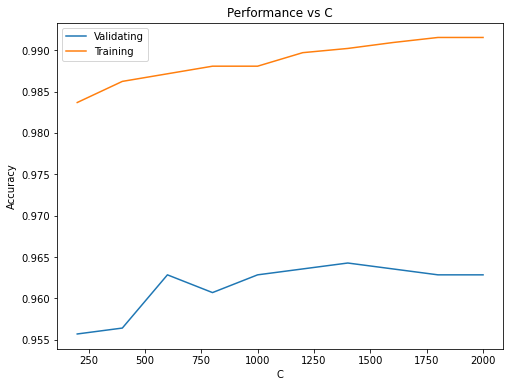

In [40]:
# visualize the results for different values of regularization parameter C
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results['param_C'], results['mean_test_score'], label='Validating')
plt.plot(results['param_C'], results['mean_train_score'], label='Training')
plt.xlabel('C'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Performance vs C')

In [41]:
# define the default model using the default hyperparameters
default_model = SVC()

# define the final model using the hyperparameters with best performance
final_model = grid_search.best_estimator_

final_model

SVC(C=1400, degree=0, gamma=100, kernel='linear')

In [42]:
# use the default model to fit the training data
default_model.fit(X_train_final, y_train_final)

SVC()

In [43]:
# use the best model to fit the training data
final_model.fit(X_train_final, y_train_final)

SVC(C=1400, degree=0, gamma=100, kernel='linear')

In [44]:
# evaluate the accuracy for these two models
default_pred = default_model.predict(X_test_final)
final_pred = final_model.predict(X_test_final)

print(accuracy_score(y_test_final, default_pred))
print(accuracy_score(y_test_final, final_pred))

0.8433333333333334
0.98


In [ ]:
# After hyperparameters tunning, the accuracy has been increased for about 13.7%!